# Description

Todo Add Description

# Import & Config

In [56]:
# std import
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# personalized import
import tools as tls

In [2]:
# Config
pthCnf = r'conf.ini'
conf = None
try:
    with open(pthCnf, 'r') as r:
        conf = eval(r.read())
except Exception as e:
    print(e)
conf

{'PTH_DATA': '../resource/data00',
 'PTH_DATA_DESC': '../resource/DataDescription.csv'}

In [81]:
#For Processing
from scipy import integrate

# Definition

In [3]:
def readDataDescription(pthDataDesc, sep=';'):
    ret = None
    try:
        ret = pd.read_csv(pthDataDesc, sep=sep)
    except Exception as e:
        print("# ERROR - readDataDescription : %s" %(str(e)))
    return ret

In [4]:
def getInfoTrip(trip):
    ret = None, None
    try:
        tmp = trip.split("_")
        tripDatetime = datetime. strptime(tmp[0], '%Y%m%d-%H%M%S')
        tripNumber = int(tmp[1])
        ret = tripDatetime, tripNumber
    except Exception as e:
        print("# ERROR - getInfoTrip : %s" %(str(e)))
    return ret

In [35]:
def getTargetParquets(targetSigsDf):
    ret = []
    idFrmLst = targetSigsDf["ID"].drop_duplicates().tolist()
    for idFrm in idFrmLst:
        tmpDf = targetSigsDf[targetSigsDf["ID"].apply(lambda x: x == idFrm)]
        sigs = tmpDf.Signal.tolist()       
        parquetName = str(tmpDf.iloc[0]['ID']).zfill(4)+"_"+tmpDf.iloc[0]['SortName']+".parquet"
        ret.append((parquetName,sigs))
    return ret

In [53]:
def readParquets(targetParquets):
    ret = None
    isFirst = True
    for targetParquet in targetParquets:
        parquetName, sigs = targetParquet
        pthParquet = os.path.join(pthTrip, parquetName)
        if os.path.isfile(pthParquet):
            df = pd.read_parquet(pthParquet, columns=sigs)
            if isFirst:
                ret = df
                isFirst = False
            else:
                ret = pd.concat([ret, df], axis=1)
        else:
            print("# WARNING - readParquets : can not find file %s" %(pthParquet))
    return ret

# Pre-Processing

In [6]:
# Data Description
desc = readDataDescription(conf['PTH_DATA_DESC'])
desc.head()

,ID,SortName,Period,Signal,Pilote,Min,Max,Unite,ValuesDescr
0,9,DIAG_ETAT_SCB_D_LIN4,0,RESERVE_16,NaN,0.0,0.0,NaN,NaN
1,10,DIAG_ETAT_SPB_D_LIN4,0,RESERVE_16,NaN,0.0,0.0,NaN,NaN
2,12,DIAG_ETAT_SPB_P_LIN4,0,RESERVE_16,NaN,0.0,0.0,NaN,NaN
3,19,DIAG_CDE_TOV_LIN4,0,RESERVE_16,NaN,0.0,0.0,NaN,NaN
4,20,DIAG_ETAT_BRNC_AVD_LIN4,0,RESERVE_8,NaN,0.0,0.0,NaN,NaN


In [7]:
# Signal List
sigLst = desc.Signal.drop_duplicates()
for sig in sigLst:
    print(sig)

RESERVE_16
RESERVE_8
RESERVE_64
DATA_DIAG
RESERVE_32
CONS_SOUL_THERM_COMP
TYPAGE_U_SEEM
POS_MEAP_SOFT
CMD_MEAP
PREPA_AR_EN_COURS
CPT_NBR_REDEM
DDE_TENS_MIN_GMV
DDE_BOOST_SCR_INJ
DDE_BOOST_SCR_DEGEL
ETAT_DEBIT_AERO
REQ_CHARGE_MOT
DEFAUT_CMM
TEMP_CARB
T_CLUTCH_WARN_REQ
U_SEEM_REF
THERM_AC_CUTOFF_REQ
K_U_SEEM
TEMP_REGUL_EAU_MOT
REGIME_MOTEUR
COUPLE_REEL
VOLONTE_COND
AC_OUT
CONTACT_FREIN2
ETAT_RVV_LVV
CPLE_MT_INCERTAINS
FIGEAGE_PERTURB_CPLE
RESERVE_1
DIAG_MUX_ON_PWT
CPLE_POT_APR_TRT
CPLE_REEL_HORS_BV
CPLE_ANTICIPE
CPLE_COND_APR_TRT
LIBRE_2
CPT_PROCESS_4B_DAE
CHKSUM_TRME_DYN_DAE
CPLE_VOLANT_OPTMSE
CAUSE_DESACTIV_CPK
ETAT_DAE_CPK
SSP_DAE_DEF
ANGLE_COLONNE
VITESSE_COLONNE
ETAT_SECU_ANGLE_COL
VIRTUAL_SWS3_EPS_STATE
EAU_GAZOLE
SOUTIEN_GENE_ELECT
ETAT_CMM_DYN
RAP_ENGAGE_CALCULE
CPLE_COND_AVT_TRT
PRESSION_REFRI_2
COUPLE_RESISTANT
ACQ_ASR_MSR
ETAT_CNS_ASR_MSR
CONT_EMBR_CMM
CONS_SOUL_PUIS_COMP
ETAT_MT
MODES_DEGRADES_MT
BES_PREP_MOT
PRES_DEF_OBD_SIGNALE_SUR_MIL
REQ_MIL_FIXE
REQ_MIL_CLNGNT
ETAT_REALI

In [36]:
targetSigs = ["VITESSE_VEHICULE_ROUES",
              "REGIME_MOTEUR",
              "ACCEL_LONGI_ROUES",
              "ACCEL_LAT",
              "DISTANCE_ROUES",
              "SENS_ROULAGE",
              "ANGLE_COLONNE",
              "CONTACT_FREIN2",
              "ETAT_FNCT_FREIN_STATION"
             ]
targetSigsDf = desc[desc["ID"].apply(lambda x: x != 3000) & desc["Signal"].apply(lambda x: x in targetSigs)]
targetParquets = getTargetParquets(targetSigsDf)
targetParquets

[('0443_DIAG_INST_HS1.parquet', ['REGIME_MOTEUR', 'CONTACT_FREIN2']),
 ('0722_DIAG_INST_HS1.parquet', ['ANGLE_COLONNE']),
 ('0881_DIAG_INST_HS1.parquet',
  ['VITESSE_VEHICULE_ROUES',
   'DISTANCE_ROUES',
   'ACCEL_LONGI_ROUES',
   'SENS_ROULAGE']),
 ('0903_DIAG_INST_HS1.parquet', ['ETAT_FNCT_FREIN_STATION']),
 ('0949_DIAG_INST_HS1.parquet', ['ACCEL_LAT'])]

# Processing

In [9]:
for trip in os.listdir(conf['PTH_DATA']):
    pthTrip = os.path.join(conf['PTH_DATA'], trip)
    
    print(trip)
    tripDatetime, tripNumber = getInfoTrip(trip)
    df = readParquets(targetParquets)
    break
tripDatetime, tripNumber

20210624-110922_00058


(datetime.datetime(2021, 6, 24, 11, 9, 22), 58)

In [59]:
df.head()

,REGIME_MOTEUR,CONTACT_FREIN2,ANGLE_COLONNE,VITESSE_VEHICULE_ROUES,DISTANCE_ROUES,ACCEL_LONGI_ROUES,SENS_ROULAGE,ACCEL_LAT
timestamp,,,,,,,,
1.624412e+09,8191.875,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1.624412e+09,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1.624412e+09,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1.624412e+09,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1.624412e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


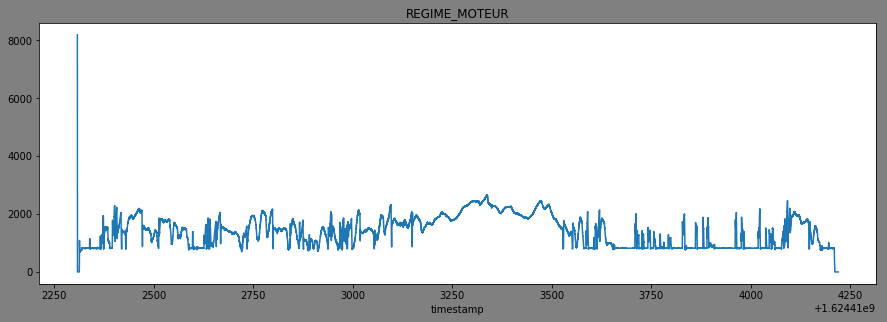

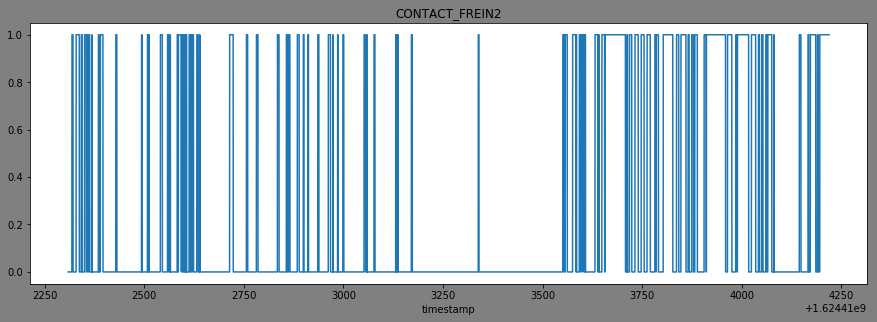

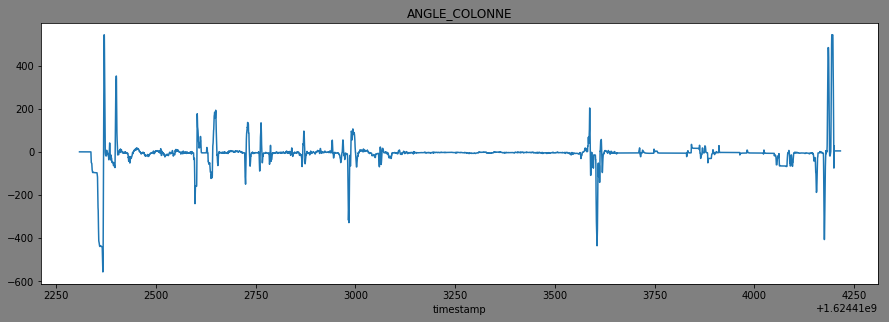

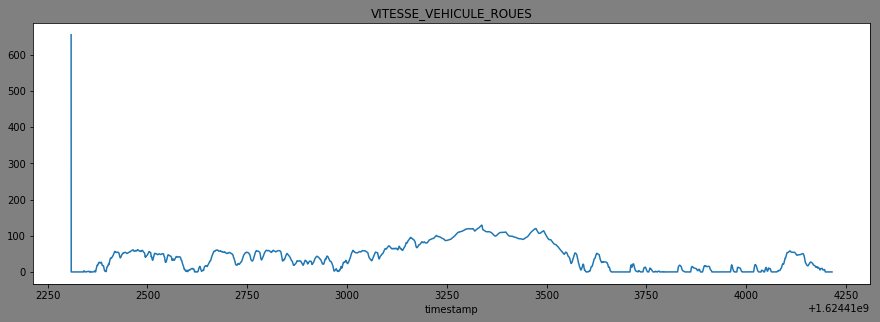

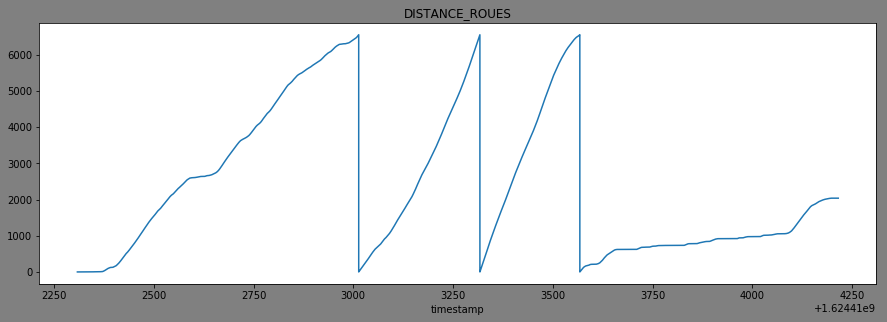

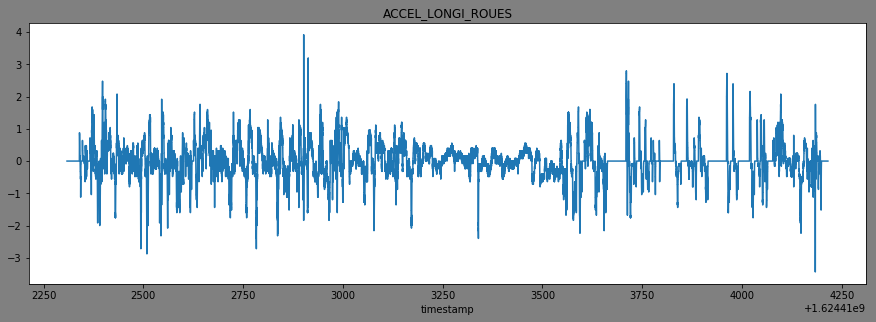

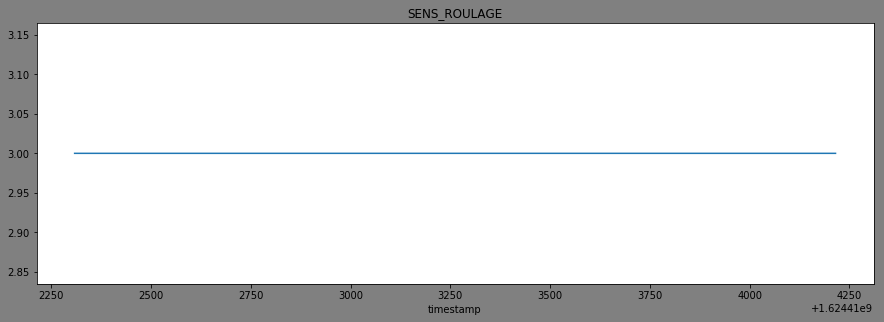

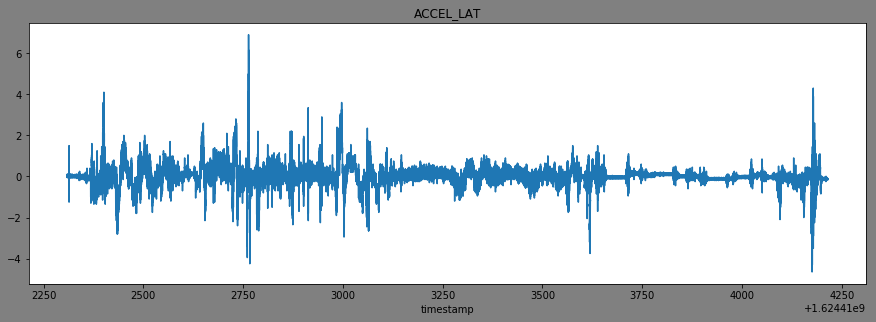

In [78]:
plt.close("all")
for sig in df.columns:
    plt.figure(figsize=[15, 4.8], facecolor='grey')
    df[df[sig].notnull()][sig].plot(title=sig)
plt.show()

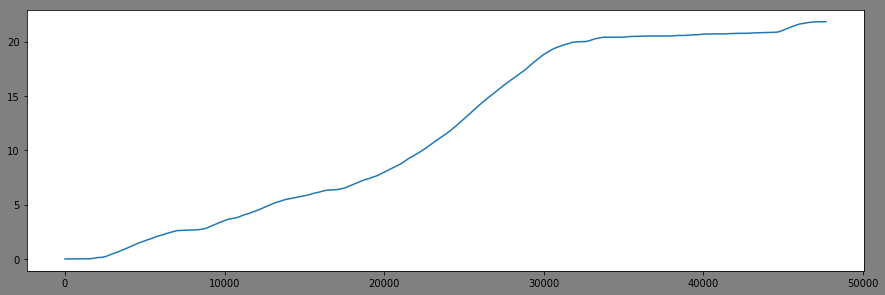

('Distance Parcourue', 21.818707897886657)

In [137]:
sig = "VITESSE_VEHICULE_ROUES"
spd = df[df[sig].notnull()][sig].apply(lambda x: x/3600.)

distKm = integrate.cumtrapz(spd.values, spd.index, initial=0)

plt.figure(figsize=[15, 4.8], facecolor='grey')
plt.plot(distKm)
plt.show()

"Distance Parcourue", max(distKm)

# For Test